### Clustering 군집
클러스터링은 비슷한 특성을 가진 데이터들을 그룹화하는 데이터 분석 기법입니다. 

클러스터링은 비지도 학습(Unsupervised Learning)의 한 분야로, 데이터의 패턴이나 구조를 발견하고 유사한 특성을 가진 데이터들을 동일한 그룹으로 묶는데 사용됩니다.

### K-Means
K-Means는 가장 일반적으로 사용되는 클러스터링 알고리즘 중 하나입니다. 

K-Means는 주어진 데이터를 K개의 클러스터로 그룹화하는 비지도 학습 알고리즘입니다. 

각 클러스터는 중심(centroid)이라고 불리는 점을 가지며, 중심은 클러스터 내 데이터들과의 거리를 최소화하는 방식으로 결정됩니다.

거리 기반 알고리즘으로 속성의 개수가 매우 많을 경우 군집화의 정확도가 아주 떨어짐

<img src = 'https://miro.medium.com/v2/resize:fit:1400/format:webp/1*rw8IUza1dbffBhiA4i0GNQ.png'>

Image by <a href = 'https://towardsdatascience.com/k-means-a-complete-introduction-1702af9cd8c'>K-means: A Complete Introduction</a>

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline 

iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
# cm 제거 
cols = [each[:-5] for each in iris.feature_names]
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [5]:
iris_df = pd.DataFrame(data = iris.data, columns=cols)
iris_df

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
feature = iris_df[['petal length', 'petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### 군집화 시작

In [8]:
model = KMeans(n_clusters=3) # 군집화할 개수, 즉 군집 중심점의 개수 
model.fit(feature)

c:\Users\YUN\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YUN\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [9]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
#중심 군집값값
model.cluster_centers_

array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [11]:
predict = pd.DataFrame(model.predict(feature), columns=['cluster'])
feature = pd.concat([feature, predict], axis = 1)
feature.head()

,petal length,petal width,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


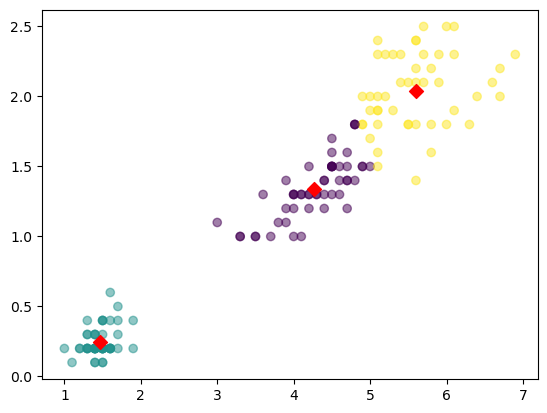

In [12]:
centers = pd.DataFrame(model.cluster_centers_,
                        columns=['petal length', 'petal width'])
center_x = centers['petal length']
center_y = centers['petal width']

plt.plot(figsize=(12, 8))
plt.scatter(feature['petal length'], feature['petal width'],
            c=feature['cluster'], alpha=0.5)

plt.scatter(center_x, center_y, s=50, marker='D', c='r')
plt.show()

### make_blobs
이 함수는 가상의 데이터 포인트를 생성하여 덩어리 또는 클러스터로 그룹화합니다. 

In [18]:
from sklearn.datasets import make_blobs


X, y = make_blobs(n_samples=200, #200개의 데이터 포인트를 생성
                  n_features=2, #각 데이터 포인트가 2차원 공간에 존재
                  centers=3, #데이터 포인트가 3개의 클러스터 또는 덩어리로 그룹화
                  cluster_std=0.8, # 클러스터의 표준 편차를 설정합니다. 이 값이 클수록 클러스터 내의 데이터 포인트가 더 흩어짐
                  random_state=0)

print(X.shape, y.shape)

unique, counts = np.unique(y, return_counts = True)
print(unique, counts)

# [0 1 2]는 레이블의 고유한 값들을 나타내며, [67 67 66]은 각 고유한 값의 개수를 나타냄
# 즉, 첫 번째 클러스터에는 67개의 데이터 포인트
# 두 번째 클러스터에는 67개의 데이터 포인트
# 세 번째 클러스터에는 66개의 데이터 포인트가 할당

(200, 2) (200,)
[0 1 2] [67 67 66]


In [38]:
cluster_df = pd.DataFrame(X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head()

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


In [40]:
# 군집화
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=13)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

c:\Users\YUN\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YUN\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


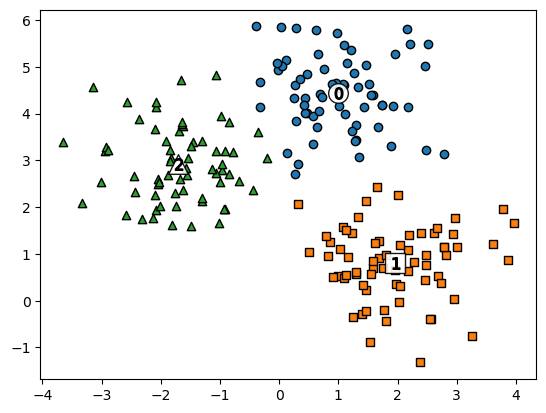

In [43]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x = label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                marker = markers[label])
    
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color = 'white',
                alpha=0.9, edgecolors='k', marker = markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color = 'k',
                edgecolors='k', marker = '$%d$'%label)
    
plt.show()

#### 결과 확인

In [44]:
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64


### 군집 평가


### 실루엣 분석

- 실루엣 분석은 군집 간의 거리가 알마나 효율적으로 분리되어 있는지 나타냄
- 다른 군집과는 거리가 떨어져 있고, 동일 군집간의 데이터는 서로 가깝게 잘 뭉쳐있는지 확인
- 군집화가 잘 되어 있을 수록 개별 군집은 비숫한 정도의 여유공간을 가지고 있음 
- 실류엣 개수 : 개별 데이터가 가지는 군집화 지표  

In [47]:
cols

['sepal length', 'sepal width', 'petal length', 'petal width']

In [48]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris_df)
iris_df['cluster'] = kmeans.labels_
iris_df.head()

c:\Users\YUN\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\YUN\miniconda3\envs\ds_study\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal length,sepal width,petal length,petal width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [50]:
from sklearn.metrics import silhouette_samples, silhouette_score

avg_value = silhouette_score(iris.data, iris_df['cluster'])
score_value = silhouette_samples(iris.data, iris_df['cluster'])

print('avg_value : ',avg_value)
print('silhouette_samples() return 값의 shape: ',score_value.shape)



avg_value :  0.5528190123564095
silhouette_samples() return 값의 shape:  (150,)


In [51]:
!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     -------------------------------------- 282.6/282.6 kB 8.5 MB/s eta 0:00:00


c:\Users\YUN\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
c:\Users\YUN\miniconda3\envs\ds_study\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


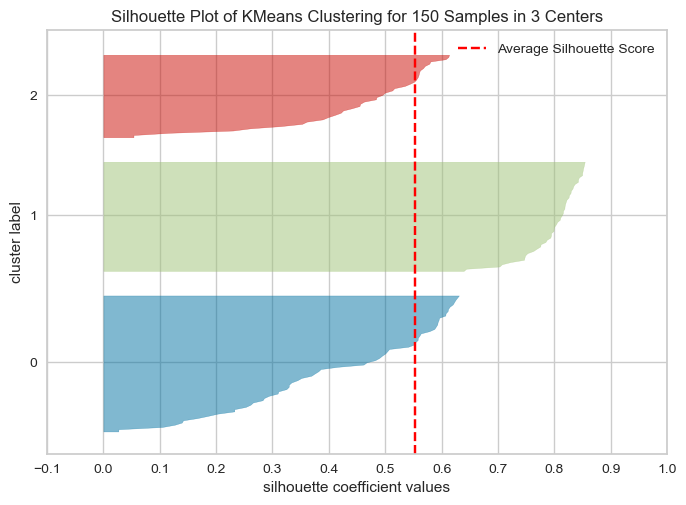

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=0))

: 

In [52]:
from yellowbrick.cluster import silhouette_visualizer
silhouette_visualizer(kmeans, iris.data, colors= 'yellowbrick')